# Midterm Project

For the midterm project you'll get to practice the data science process by trying out a regression problem! You'll then get to compare your model performance to other peers' work on the same dataset as well as work on several other datasets. This will allow you to see new ideas on the same problem as well as nuances of the same technique across different datasets. 

# Datasets

You will take one of the following datasets and apply a standard data science process of exploratory analysis, cleaning and machine learning. This process will be outlined in several large stages. To start, take your dataset, import the data and begin doing some initial exploratory analysis using the tools and techniques we have covered thus far. You will find all three datasets under a folder titled 'Datasets'.


* Walmart Sales Forecasting
* Estimating NYC Cab Trip Duration
* Lego Sets (previously seen)

## Project Outline
* Load Data
* Exploratory Analysis
* Initial Model
* Evaluation
* Feature Engineering
* Model 2
* Evaluation
* Further Investigation/Exploration

# Load the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#!pwd
df = pd.read_csv('Datasets/Walmart_Sales_Forecasting.csv')
df.head(4)
#if weekly sales go up on holidays; show all rows with holidays

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False


# Exploratory Data Analysis

In [3]:
#first few ideas:
#which week of the year has the most sales? do weekly sales go up on holidays?; show all rows with holidays

In [4]:
df.info()
print(df.IsHoliday.value_counts(normalize='True'))
#df['week_of_year'] = df.Weekly_Sales.dt.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
False    0.929642
True     0.070358
Name: IsHoliday, dtype: float64


In [5]:
#convert Date column from data type object to data type datetime
df.Date = df.Date.astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [6]:
#create new column with each week as week in year
df.Date.head()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

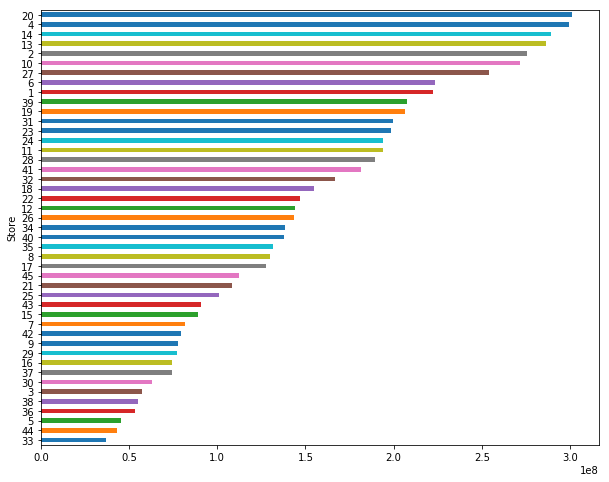

In [7]:
#which stores have the most sales
df.groupby('Store')['Weekly_Sales'].sum().sort_values().plot(kind='barh', figsize=(10,8))

Text(0.5,1,'Sales Over Time')

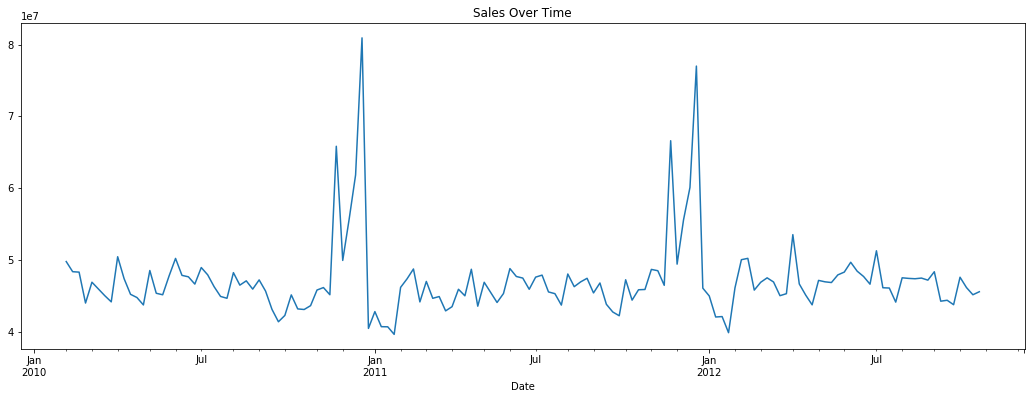

In [8]:
#for all stores combined, are sales increasing or decreasing over time? look at this weekly, monthly, yearly
#i.e. chart sales vs time
df.groupby('Date')['Weekly_Sales'].sum().plot(kind='line', figsize=(18, 6))
plt.title('Sales Over Time')

In [9]:
#which stores have seen the most increase in sales over time? decrease in sales over time?

In [10]:
#which weeks correspond to holidays?
#df[['IsHoliday','Date']]
#for i in range(len(df.IsHoliday)):
#    if df.IsHoliday[i] is True:
#        print(df.Date[i])


In [11]:
#Are sales on average higher during sale weeks?
df.groupby('IsHoliday')['Weekly_Sales'].mean().sort_values()

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

In [12]:
#average sales per store
df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)

Store
20    29508.301592
4     29161.210415
14    28784.851727
13    27355.136891
2     26898.070031
10    26332.303819
27    24826.984536
6     21913.243624
1     21710.543621
39    21000.763562
Name: Weekly_Sales, dtype: float64

In [48]:
#are there any stores that sell more on average during non holiday weeks
#df['IsHolidayTrue'] = np.where(df['IsHoliday'],True,False)
#grouped = df.groupby('Store')[['Weekly_Sales', 'IsHoliday']].sum()
#grouped = df.groupby('Store')['Weekly_Sales'].sum()
pivot = pd.pivot_table(df, index=['Store','IsHoliday'], aggfunc='mean')
pivot.columns
#why did pd.pivot_table(grouped, index=['Store','IsHoliday'], aggfunc='sum') return an error?
#grouped.pivot(index='Store', columns='IsHoliday', values='Weekly_Sales')
#pivot.head()

Index(['Dept', 'Weekly_Sales'], dtype='object')

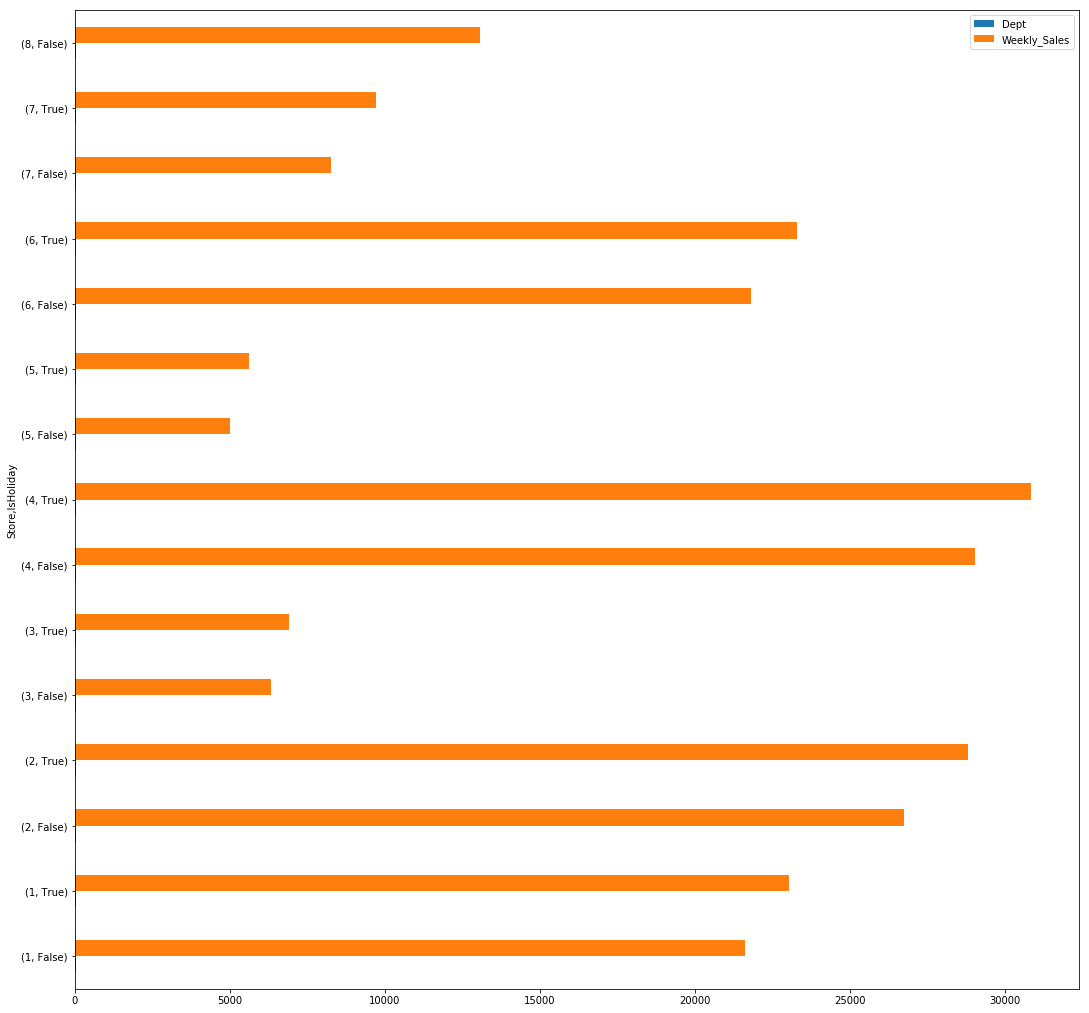

In [17]:
pivot.head(15).plot(kind='barh', figsize=(18,18))

In [37]:
#insert day of week column
#df['Weekday']=df.Date.dt.day_name() 
#(shows that weekly sales are recorded on fridays)

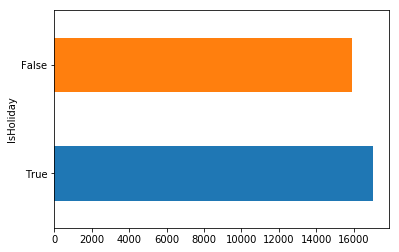

In [32]:
df.groupby('IsHoliday')['Weekly_Sales'].mean().sort_values(ascending=False).plot(kind='barh')
#sales are higher on holiday weeks, on average

In [36]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

In [52]:
grouped = df.groupby(['IsHoliday','Store'])['Weekly_Sales'].agg(['mean'])
grouped.head()
grouped.index

MultiIndex(levels=[[False, True], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]],
           names=['IsHoliday', 'Store'])

In [53]:
grouped = grouped.reset_index()
grouped.head()

,IsHoliday,Store,mean
0,False,1,21609.634733
1,False,2,26753.864227
2,False,3,6332.098604
3,False,4,29032.260570
4,False,5,5010.249172


In [54]:
grouped.columns

Index(['IsHoliday', 'Store', 'mean'], dtype='object')

In [55]:
pivot = grouped.pivot(index='IsHoliday', columns='Store', values='mean')
pivot.head()

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
IsHoliday,,,,,,,,,,,,,,,,,,,,,
False,21609.634733,26753.864227,6332.098604,29032.260570,5010.249172,21806.854728,8254.246774,13066.406406,8723.575683,26116.166656,...,8597.374014,10306.767529,7493.363637,20905.594997,13730.522084,17915.373396,11425.515827,13410.729834,6046.886331,11614.648240
True,23039.386667,28798.710526,6916.446288,30854.231417,5617.212609,23313.563481,9730.828726,14013.374425,9423.213136,29195.524157,...,8412.829062,10170.842685,7480.585843,22254.339742,14197.663028,18775.637918,11680.949753,13473.438093,5932.577174,12298.436956


In [56]:
pivot = pivot.reset_index()
pivot.head(5)

Store,IsHoliday,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,False,21609.634733,26753.864227,6332.098604,29032.260570,5010.249172,21806.854728,8254.246774,13066.406406,8723.575683,...,8597.374014,10306.767529,7493.363637,20905.594997,13730.522084,17915.373396,11425.515827,13410.729834,6046.886331,11614.648240
1,True,23039.386667,28798.710526,6916.446288,30854.231417,5617.212609,23313.563481,9730.828726,14013.374425,9423.213136,...,8412.829062,10170.842685,7480.585843,22254.339742,14197.663028,18775.637918,11680.949753,13473.438093,5932.577174,12298.436956


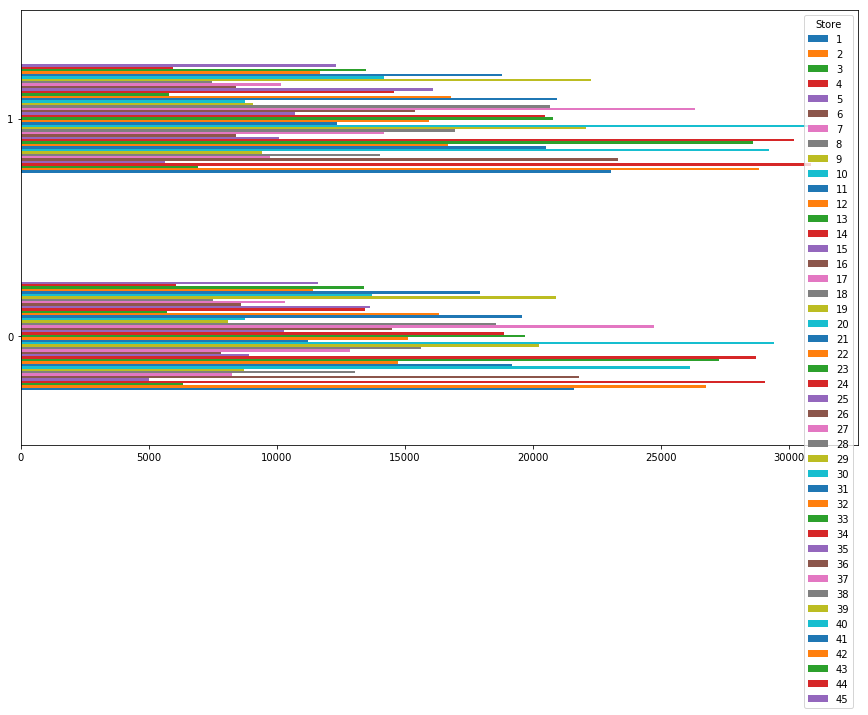

In [58]:
pivot.plot(kind='barh', figsize=(15,8))

In [59]:
pivot.set_index('Store').plot(kind='barh', figsize=(15,8))

KeyError: 'Store'